# Random Forest

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 7.8 MB/s eta 0:00:00


In [ ]:
import optuna

print("Версия Optuna: {}".format(optuna.__version__))

Версия Optuna: 3.1.0


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
import joblib

In [ ]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train MAE: {:.2f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.2f}%'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('Train R^2: {:.2f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('\n')
    print('Test MAE: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE: {:.2f}%'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))
    print('Test R^2: {:.2f}'.format(metrics.r2_score(y_test, y_test_predict)))

def print_test(y_test, y_test_pred):
  y_t = []
  y_t_p = []
  cnt = 0
  for i in range(len(y_test)):
    if cnt < len(y_test):
      y_t.append(y_test[cnt])
      y_t_p.append(y_test_pred[cnt])
      cnt += 1000
    else:
      break
  return(y_t, y_t_p)

In [ ]:
X_train_scaled = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/X_train_scaled.zip')
X_test_scaled = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/X_test_scaled.zip')
y_train = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/y_test.csv')
y_train = y_train['target'].tolist()
y_test = y_test['target'].tolist()
y_train_log = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/y_train_log.csv')
y_train_log = y_train_log['target'].tolist()

In [ ]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(len(y_train))
print(len(y_test))

(280575, 25)
(70144, 25)
280575
70144


In [ ]:
random_state = 42

In [ ]:
# Гип. параметры по умолчанию
rfr = RandomForestRegressor()
hiperparams = rfr.get_params()

print("Гиперпараметры по умолчанию:")
for key, value in hiperparams.items():
    print(f"\t{key}: {value}")

Гиперпараметры по умолчанию:
	bootstrap: True
	ccp_alpha: 0.0
	criterion: squared_error
	max_depth: None
	max_features: 1.0
	max_leaf_nodes: None
	max_samples: None
	min_impurity_decrease: 0.0
	min_samples_leaf: 1
	min_samples_split: 2
	min_weight_fraction_leaf: 0.0
	n_estimators: 100
	n_jobs: None
	oob_score: False
	random_state: None
	verbose: 0
	warm_start: False


In [ ]:
def RFR(trial):
    
    param = {
        
        # 'max_depth': trial.suggest_int('max_depth', 1, 8),
        # 'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        # 'n_estimators': 1000,
        # 'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        # 'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        # 'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        # 'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        # 'colsample_bytree': 0.8,
        # 'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        # 'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        # 'eta': trial.suggest_float('eta', 0.05, 0.5),
        # 'random_state': trial.suggest_int('random_state', 1, 1000),
        # 'random_state': 42

        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'min_samples_split': trial.suggest_int('min_samples_split', 3, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 3, 10),
        # 'max_features': trial.suggest_categorical("max_features", ["auto", "sqrt"]),
        'max_depth': trial.suggest_int('max_depth', 3, 40),
        'bootstrap': True,
        'oob_score': True,
        'random_state': 42
    }
    
    # Инициализируем XGBRegressor объект.
    rfr = RandomForestRegressor(**param)

    rfr.fit(X_train_scaled, y_train_log)
    y_test_pred = np.exp(rfr.predict(X_test_scaled))
    
    score = metrics.r2_score(y_test, y_test_pred)

    return score

https://stackoverflow.com/questions/69482251/random-forest-hyper-parameters-tuning-with-panel-data-in-python

In [10]:
%%time
study = optuna.create_study(direction='maximize')
study.optimize(RFR, n_trials=10)
print('=======================================================')
print('No of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-03-15 03:52:22,507] A new study created in memory with name: no-name-6739f639-8397-4996-abb7-34d8b44fbb89
[I 2023-03-15 03:55:54,540] Trial 0 finished with value: 0.8379005620018627 and parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_depth': 39}. Best is trial 0 with value: 0.8379005620018627.
[I 2023-03-15 04:00:50,434] Trial 1 finished with value: 0.8263955515774553 and parameters: {'n_estimators': 168, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_depth': 13}. Best is trial 0 with value: 0.8379005620018627.
[I 2023-03-15 04:09:54,203] Trial 2 finished with value: 0.8339787667991745 and parameters: {'n_estimators': 295, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_depth': 16}. Best is trial 0 with value: 0.8379005620018627.
[I 2023-03-15 04:17:44,974] Trial 3 finished with value: 0.8378419473241272 and parameters: {'n_estimators': 238, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_depth': 21}. Best is trial 0 with value

No of finished trials: 10
Best trial: {'n_estimators': 199, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': 28}
CPU times: user 1h 6min 46s, sys: 6.99 s, total: 1h 6min 53s
Wall time: 1h 7min 18s


In [11]:
# рассчитаем точность для обучающей и тестовой выборок.
rfr = RandomForestRegressor(**study.best_params, random_state=random_state)
rfr.fit(X_train_scaled, y_train_log)

# Производим сериализацию и сохраняем результат в файл формата .joblib
joblib.dump(rfr, '/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/fit_models/rfr.joblib')

y_train_pred_rfr = np.exp(rfr.predict(X_train_scaled))
y_test_pred_rfr = np.exp(rfr.predict(X_test_scaled))

# Сохраним предсказание в файл.
np.savetxt("/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/y_test_pred/y_test_pred_rfr.csv", y_test_pred_rfr, delimiter=",")

print_metrics(y_train, y_train_pred_rfr, y_test, y_test_pred_rfr)

Train MAE: 50028.29
Train MAPE: 10.26%
Train R^2: 0.87


Test MAE: 61852.55
Test MAPE: 15.26%
Test R^2: 0.85


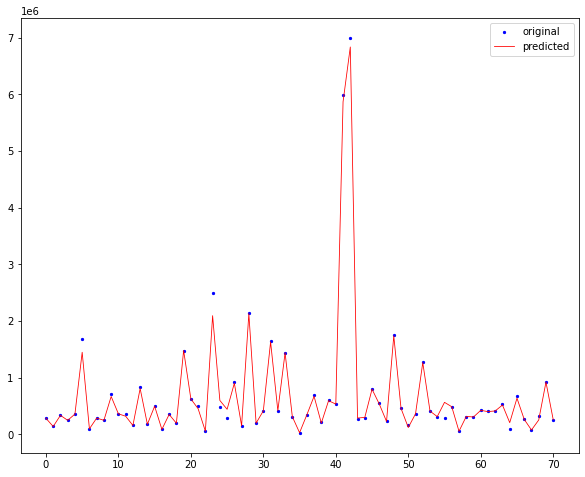

In [14]:
# Возмём каждую 1000-ю строку из выборок, чтобы визуально убедиться в точности предсказаний.
y_t, y_t_p = print_test(y_test, y_test_pred_rfr)

# Визуализируем предсказания на тестовой выборке.
x_ax = range(len(y_t))
plt.figure(figsize=(10,8))
# Точки тестовой выборки.
plt.scatter(x_ax, y_t, s=5, color="blue", label="original")
# График предсказаний.
plt.plot(x_ax, y_t_p, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

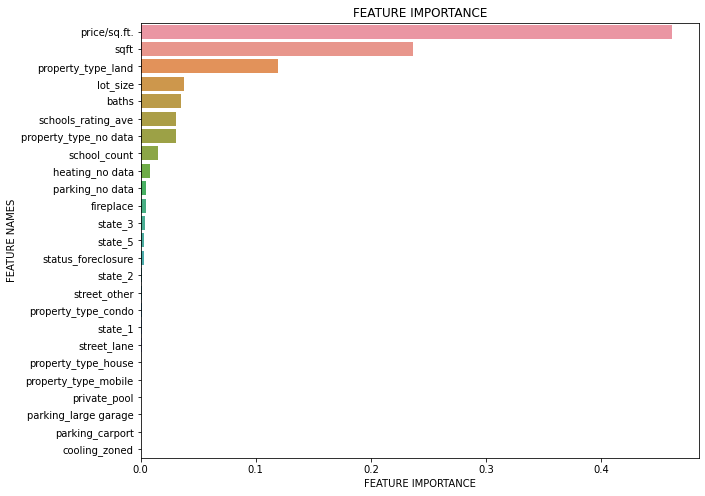

In [15]:
# Покажем важность признаков.
feature_importance = np.array(rfr.feature_importances_)
feature_names = np.array(X_train_scaled.columns)

# Создадим DataFrame, используя словарь.
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

# Определим размер столбчатой диаграммы.
plt.figure(figsize=(10, 8))
# Построим столбчатую диаграмму.
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
# Добавим метки диаграммы.
plt.title('FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES');

In [16]:
mae_rfr = metrics.mean_absolute_error(y_test, y_test_pred_rfr)
mape_rfr = metrics.mean_absolute_percentage_error(y_test, y_test_pred_rfr)*100
r2_rfr = metrics.r2_score(y_test, y_test_pred_rfr)

print(round(mae_rfr, 2))
print(round(mape_rfr, 2))
print(round(r2_rfr, 2))

61852.55
15.26
0.85


In [17]:
optuna.visualization.plot_optimization_history(study, target_name="r2_score")

In [18]:
optuna.visualization.plot_param_importances(study, target_name="r2_score")